In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
# from sklearn.dummy import DummyRegressor 
# model = DummyRegressor()
# model.fit(X,y)

In [3]:

# from sklearn.preprocessing import LabelEncoder

# # Drop from train
# train = train.drop(['userId', 'sessionId'], axis=1, errors='ignore')

# # Fallback: generate dummy IDs for test data (since 'id' and 'sessionId' don't exist)
# test_ids = pd.Series(range(len(test)))

# # Drop from test
# test = test.drop(['userId', 'sessionId'], axis=1, errors='ignore')

# # Split target
# y = train['purchaseValue']
# X = train.drop('purchaseValue', axis=1)

# # Combine for processing
# all_data = pd.concat([X, test], axis=0)

# # Fill missing values
# for col in all_data.select_dtypes(include='object').columns:
#     all_data[col] = all_data[col].fillna('missing')

# for col in all_data.select_dtypes(exclude='object').columns:
#     all_data[col] = all_data[col].fillna(all_data[col].median())

# # Encode categoricals
# for col in all_data.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     all_data[col] = le.fit_transform(all_data[col].astype(str))

# # Split again
# X = all_data.iloc[:len(train)]
# X_test = all_data.iloc[len(train):]


In [4]:
# submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
# submission.to_csv('submission.csv',index=False)

# 1. **MILESTONE 1:- Basic Data Analysis**

***<h3>1.1 Data loading and overview</h3>***

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')


train= pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 
sample = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv")

print(f"Train data shape: {train.shape}")
print(f"Test data shape: {test.shape}")
print(f"Sample submission shape: {sample.shape}")
print("\n=== TRAIN DATA INFO ===")
print(train.info())
print("\n=== TEST DATA INFO ===")
print(test.info())

Train data shape: (116023, 52)
Test data shape: (29006, 51)
Sample submission shape: (29006, 2)

=== TRAIN DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   tra

***<H3>1.2 Column Analysis</H3>***

In [6]:
print(f"Train columns ({len(train.columns)}): {list(train.columns)}")
print(f"\nTest columns ({len(test.columns)}): {list(test.columns)}")
print(f"\nSample submission columns: {list(sample.columns)}")

train_only = set(train.columns) - set(test.columns)
test_only = set(test.columns) - set(train.columns)
print(f"\nColumns only in train: {train_only}")
print(f"Columns only in test: {test_only}")

Train columns (52): ['trafficSource.isTrueDirect', 'purchaseValue', 'browser', 'device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'userId', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'locationCountry', 'device.browserSize', 'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType', 'geoNetwork.city', 'trafficSource.adwordsClickInfo.page', 'geoNetwork.metro', 'pageViews', 'locationZone', 'device.mobileDeviceModel', 'trafficSource.referralPath', 'totals.bounces', 'date', 'devic

***<h3>1.3 Target Variable Analysis***

In [7]:
if 'purchaseValue' in train.columns:
    target = train['purchaseValue']
    print(f"Target variable statistics:")
    print(target.describe())
    
    print(f"\nTarget variable info:")
    print(f"Data type: {target.dtype}")
    print(f"Non-null count: {target.count()}")
    print(f"Null count: {target.isnull().sum()}")
    print(f"Unique values: {target.nunique()}")
    print(f"Min value: {target.min()}")
    print(f"Max value: {target.max()}")
    
    zero_count = (target == 0).sum()
    print(f"Zero values: {zero_count} ({zero_count/len(target)*100:.2f}%)")

Target variable statistics:
count    1.160230e+05
mean     2.656393e+07
std      2.051825e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: purchaseValue, dtype: float64

Target variable info:
Data type: float64
Non-null count: 116023
Null count: 0
Unique values: 6766
Min value: 0.0
Max value: 23129500000.0
Zero values: 92038 (79.33%)


***<h3>1.4 Missing Value Analysis***

In [8]:
def analyze_missing(df, name):
    print(f"\n{name} Dataset:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Missing_Percentage': missing_percent.values
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    print(missing_df.to_string(index=False))
    return missing_df

train_missing = analyze_missing(train, "TRAIN")
test_missing = analyze_missing(test, "TEST")


TRAIN Dataset:
                                      Column  Missing_Count  Missing_Percentage
                     trafficSource.adContent         113060           97.446196
         trafficSource.adwordsClickInfo.slot         111742           96.310214
    trafficSource.adwordsClickInfo.isVideoAd         111742           96.310214
trafficSource.adwordsClickInfo.adNetworkType         111742           96.310214
         trafficSource.adwordsClickInfo.page         111742           96.310214
                  trafficSource.referralPath          73309           63.184886
                  trafficSource.isTrueDirect          73133           63.033192
                       trafficSource.keyword          71861           61.936857
                              totals.bounces          68875           59.363230
                                  new_visits          35505           30.601691
                                   pageViews              8            0.006895

TEST Dataset:
         

***<h3>1.5 Data Types and Sample Values***

In [9]:
print("=== DATA TYPES AND SAMPLE VALUES ===")

def show_sample_data(df, name, n_samples=3):
    print(f"\n{name} Dataset - First {n_samples} rows:")
    print(df.head(n_samples))
    
    print(f"\n{name} Dataset - Data types summary:")
    dtypes_summary = df.dtypes.value_counts()
    print(dtypes_summary)

show_sample_data(train, "TRAIN")
show_sample_data(test, "TEST")

=== DATA TYPES AND SAMPLE VALUES ===

TRAIN Dataset - First 3 rows:
  trafficSource.isTrueDirect  purchaseValue browser  \
0                        NaN            0.0    Edge   
1                       True            0.0  Chrome   
2                       True            0.0  Chrome   

         device.screenResolution trafficSource.adContent  \
0  not available in demo dataset                     NaN   
1  not available in demo dataset                     NaN   
2  not available in demo dataset                     NaN   

  trafficSource.keyword screenSize geoCluster  \
0                   NaN     medium   Region_2   
1                   NaN     medium   Region_3   
2        (not provided)     medium   Region_2   

  trafficSource.adwordsClickInfo.slot    device.mobileDeviceBranding  ...  \
0                                 NaN  not available in demo dataset  ...   
1                                 NaN  not available in demo dataset  ...   
2                                 NaN  not

***<h3>1.6 Sample Submission file analysis</h3>***

In [10]:
print("=== SAMPLE SUBMISSION ANALYSIS ===")
print("Sample submission head:")
print(sample.head(10))
print(f"\nSample submission shape: {sample.shape}")
print(f"Sample submission columns: {list(sample.columns)}")

if 'purchaseValue' in sample.columns:
    print(f"\nSample submission target values:")
    print(sample['purchaseValue'].describe())

=== SAMPLE SUBMISSION ANALYSIS ===
Sample submission head:
   ID  purchaseValue
0   0            0.0
1   1            0.0
2   2            0.0
3   3            0.0
4   4            0.0
5   5            0.0
6   6            0.0
7   7            0.0
8   8            0.0
9   9            0.0

Sample submission shape: (29006, 2)
Sample submission columns: ['ID', 'purchaseValue']

Sample submission target values:
count    29006.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: purchaseValue, dtype: float64


***<H3>1.7 EDA***

In [11]:
target = train['purchaseValue']
print(f"\nTarget Variable Statistics:")
print(f"- Total sessions: {len(target):,}")
print(f"- Purchase sessions: {(target > 0).sum():,}")
print(f"- Purchase rate: {(target > 0).mean():.3f} ({(target > 0).mean()*100:.1f}%)")
print(f"- Average purchase value: ${target.mean():,.2f}")
print(f"- Non-zero average: ${target[target > 0].mean():,.2f}")
print(f"- Target range: ${target.min():,.2f} to ${target.max():,.2f}")


Target Variable Statistics:
- Total sessions: 116,023
- Purchase sessions: 23,985
- Purchase rate: 0.207 (20.7%)
- Average purchase value: $26,563,930.08
- Non-zero average: $128,498,097.14
- Target range: $0.00 to $23,129,500,000.00


***<h3>1.8 Data Visualisation</h3>***

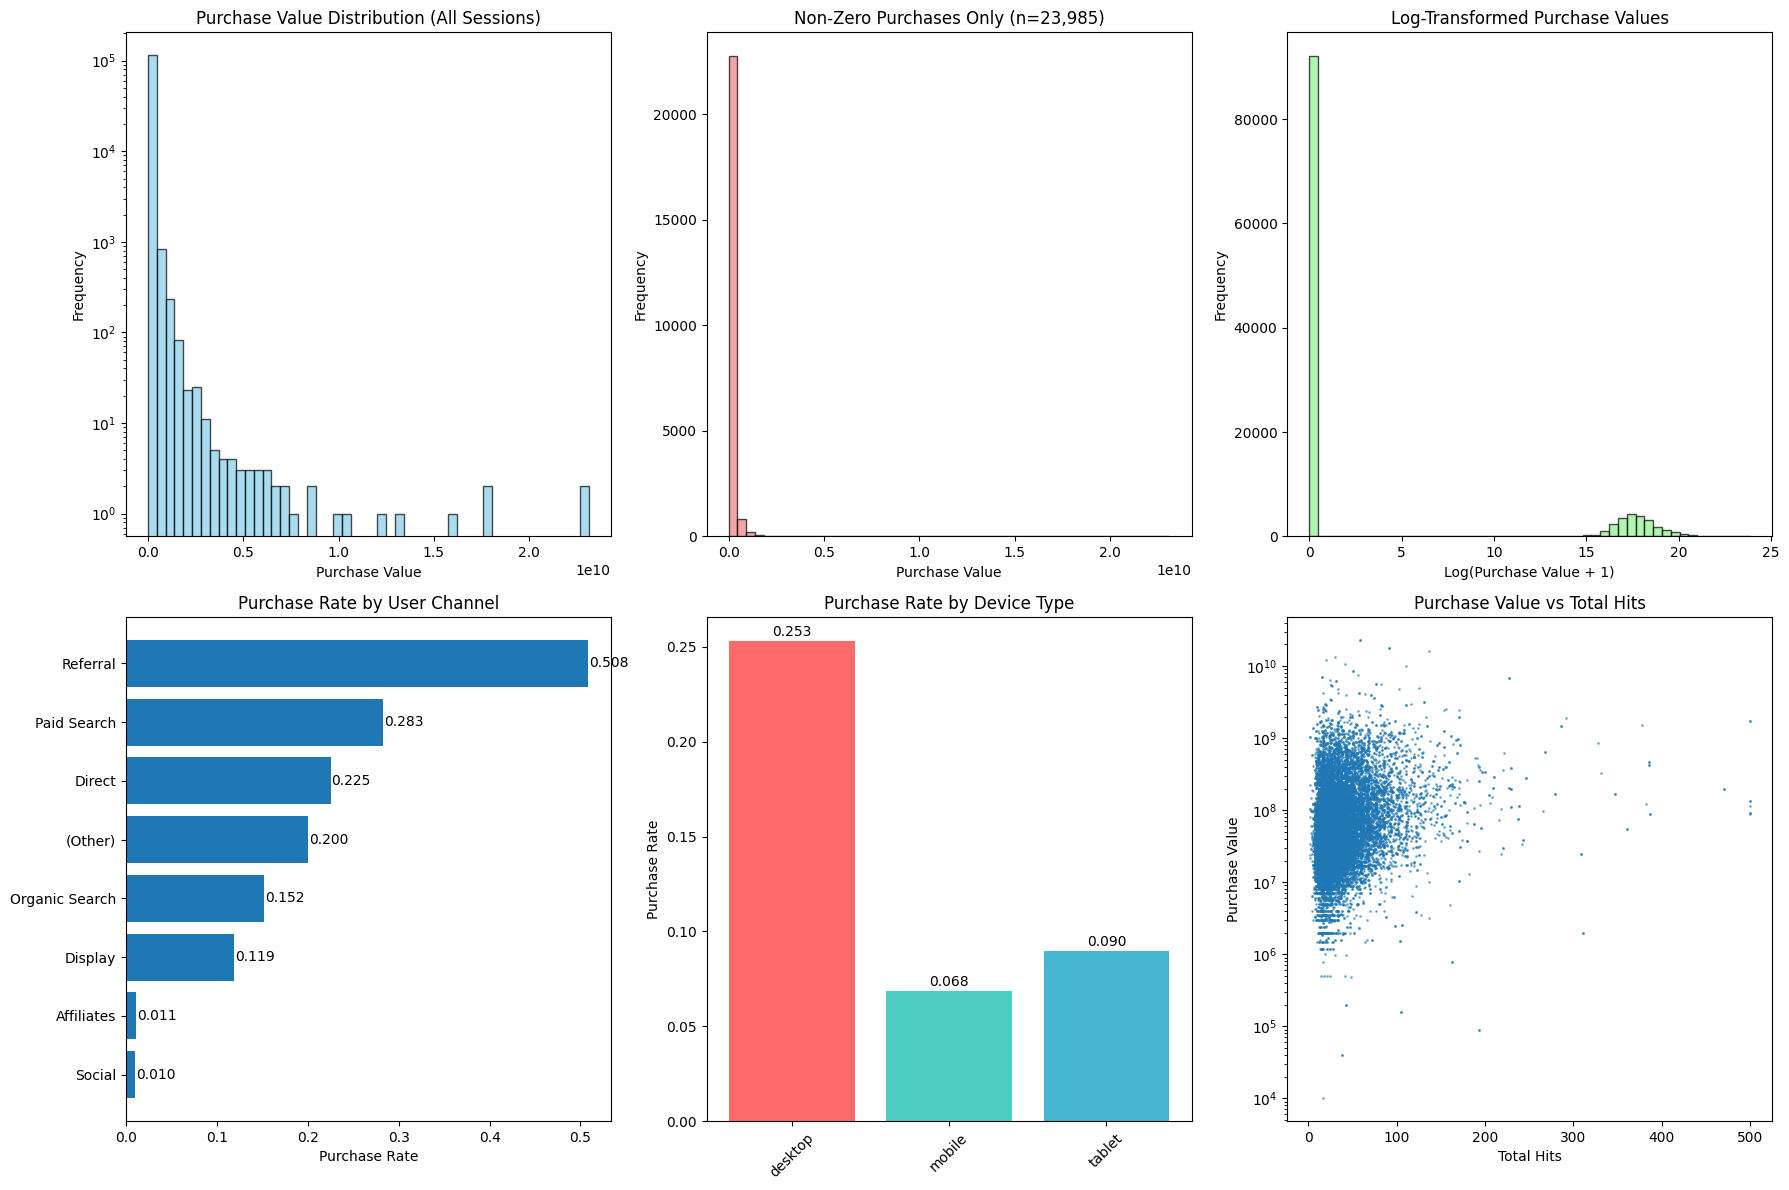

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 3.1 Target Distribution
axes[0,0].hist(target, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Purchase Value Distribution (All Sessions)')
axes[0,0].set_xlabel('Purchase Value')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_yscale('log')

# 3.2 Non-zero purchases
non_zero = target[target > 0]
axes[0,1].hist(non_zero, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title(f'Non-Zero Purchases Only (n={len(non_zero):,})')
axes[0,1].set_xlabel('Purchase Value')
axes[0,1].set_ylabel('Frequency')

# 3.3 Log-transformed purchases
log_target = np.log1p(target)
axes[0,2].hist(log_target, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Log-Transformed Purchase Values')
axes[0,2].set_xlabel('Log(Purchase Value + 1)')
axes[0,2].set_ylabel('Frequency')

# 3.4 Purchase rate by user channel
if 'userChannel' in train.columns:
    channel_stats = train.groupby('userChannel')['purchaseValue'].agg([
        'count', 
        lambda x: (x > 0).mean(),
        lambda x: x[x > 0].mean()
    ])
    channel_stats.columns = ['sessions', 'purchase_rate', 'avg_purchase']
    channel_stats = channel_stats.sort_values('purchase_rate', ascending=True)
    
    bars = axes[1,0].barh(range(len(channel_stats)), channel_stats['purchase_rate'])
    axes[1,0].set_yticks(range(len(channel_stats)))
    axes[1,0].set_yticklabels(channel_stats.index)
    axes[1,0].set_title('Purchase Rate by User Channel')
    axes[1,0].set_xlabel('Purchase Rate')
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axes[1,0].text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                       f'{width:.3f}', ha='left', va='center')

# 3.5 Purchase rate by device type
if 'deviceType' in train.columns:
    device_stats = train.groupby('deviceType')['purchaseValue'].agg([
        'count', 
        lambda x: (x > 0).mean()
    ])
    device_stats.columns = ['sessions', 'purchase_rate']
    
    bars = axes[1,1].bar(device_stats.index, device_stats['purchase_rate'], 
                         color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    axes[1,1].set_title('Purchase Rate by Device Type')
    axes[1,1].set_ylabel('Purchase Rate')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    for bar in bars:
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                       f'{height:.3f}', ha='center', va='bottom')

# 3.6 Session metrics distribution
if 'totalHits' in train.columns:
    axes[1,2].scatter(train['totalHits'], train['purchaseValue'], alpha=0.5, s=1)
    axes[1,2].set_title('Purchase Value vs Total Hits')
    axes[1,2].set_xlabel('Total Hits')
    axes[1,2].set_ylabel('Purchase Value')
    axes[1,2].set_yscale('log')

plt.tight_layout()
plt.show()

***<H3>1.9 Statistical Analysis***

In [13]:
# Correlation analysis
numerical_cols = train.select_dtypes(include=[np.number]).columns
correlation_with_target = train[numerical_cols].corr()['purchaseValue'].abs().sort_values(ascending=False)

print("Top 10 correlations with purchase value:")
print(correlation_with_target.head(10))


Top 10 correlations with purchase value:
purchaseValue                          1.000000
totalHits                              0.251651
pageViews                              0.248454
sessionNumber                          0.230585
trafficSource.adwordsClickInfo.page    0.025839
sessionId                              0.018537
sessionStart                           0.018537
date                                   0.010338
gclIdPresent                           0.005652
userId                                 0.003469
Name: purchaseValue, dtype: float64


***<H3>1.10 DATA CLEANING & PREPROCESSING***

In [14]:
numeric_features = ['totalHits', 'sessionNumber', 'totals.visits', 'userId', 'sessionStart', 'locationZone']
if train['pageViews'].isnull().sum() < len(train) * 0.5:
    numeric_features.append('pageViews')
    
X_baseline = train[numeric_features].copy()
for col in X_baseline.columns:
    X_baseline[col] = X_baseline[col].fillna(X_baseline[col].median())

y = train['purchaseValue']

X_train, X_val, y_train, y_val = train_test_split(X_baseline, y, test_size=0.2, random_state=42, stratify=(y > 0))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(" Features scaled using StandardScaler")
print(" Missing values handled with median imputation")

 Features scaled using StandardScaler
 Missing values handled with median imputation


In [15]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.5,
    random_state=42,
    n_jobs=-1
)


In [16]:
from sklearn.preprocessing import LabelEncoder

# 1. Systematic Missing Value Imputation
def comprehensive_cleaning(df):
    df_clean = df.copy()
    # NUMERIC: Fill missing with median
    num_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    # OBJECT: Fill missing with 'Unknown'
    obj_cols = df_clean.select_dtypes(include=['object']).columns
    for col in obj_cols:
        df_clean[col] = df_clean[col].fillna('Unknown')
    # BOOLEAN: Fill missing with False
    bool_cols = df_clean.select_dtypes(include=['bool']).columns
    for col in bool_cols:
        df_clean[col] = df_clean[col].fillna(False)
    return df_clean

# 2. Feature Engineering (must be same for train and test!)
def engineer_features(df):
    df_eng = df.copy()
    # Missing value indicators
    for col in ['trafficSource.keyword', 'trafficSource.referralPath', 'trafficSource.isTrueDirect', 'totals.bounces', 'new_visits']:
        if col in df_eng.columns:
            df_eng[f'{col}_missing'] = df_eng[col].isnull().astype(int)
    # Session engagement -- only create if both columns exist
    if 'totalHits' in df_eng.columns and 'pageViews' in df_eng.columns:
        df_eng['hits_per_page'] = df_eng['totalHits'] / (df_eng['pageViews'].fillna(1) + 1)
    # is_bounce
    if 'totals.bounces' in df_eng.columns:
        df_eng['is_bounce'] = (df_eng['totals.bounces'].fillna(0) > 0).astype(int)
    else:
        df_eng['is_bounce'] = 0   # Or np.nan if 0 does not make sense
    # is_new_visitor
    if 'new_visits' in df_eng.columns:
        df_eng['is_new_visitor'] = (df_eng['new_visits'].fillna(0) > 0).astype(int)
    else:
        df_eng['is_new_visitor'] = 0
    # Device
    if 'device.isMobile' in df_eng.columns:
        df_eng['is_mobile'] = df_eng['device.isMobile'].astype(int)
    else:
        df_eng['is_mobile'] = 0
    # screen_size_encoded
    if 'screenSize' in df_eng.columns:
        df_eng['screen_size_encoded'] = df_eng['screenSize'].map({'small': 0, 'medium': 1, 'large': 2}).fillna(1)
    else:
        df_eng['screen_size_encoded'] = 1
    # Traffic source
    if 'trafficSource.medium' in df_eng.columns:
        df_eng['is_direct_traffic'] = (df_eng['trafficSource.medium'] == '(none)').astype(int)
        df_eng['is_organic_search'] = (df_eng['trafficSource.medium'] == 'organic').astype(int)
        df_eng['is_paid_search'] = (df_eng['trafficSource.medium'] == 'cpc').astype(int)
    else:
        df_eng['is_direct_traffic'] = 0
        df_eng['is_organic_search'] = 0
        df_eng['is_paid_search'] = 0
    # Time features
    if 'date' in df_eng.columns:
        df_eng['date_dt'] = pd.to_datetime(df_eng['date'].astype(str))
        df_eng['day_of_week'] = df_eng['date_dt'].dt.dayofweek
        df_eng['month'] = df_eng['date_dt'].dt.month
        df_eng['is_weekend'] = (df_eng['day_of_week'] >= 5).astype(int)
    return df_eng


# 3. Outlier Capping
def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            low = Q1 - 1.5*IQR
            up = Q3 + 1.5*IQR
            df_clean[col] = df_clean[col].clip(low, up)
    return df_clean

# === UNIVERSAL CATEGORICAL ENCODING (FOR TREES, XGBOOST, LGBM) ===
def encode_categoricals_both(train, test):
    train_aligned, test_aligned = train.copy(), test.copy()
    cat_cols = train_aligned.select_dtypes(include='object').columns
    # Fit a label encoder on union of train and test for each categorical col
    for col in cat_cols:
        all_values = pd.Series(list(train_aligned[col].values) + list(test_aligned[col].values)).astype(str)
        le = LabelEncoder().fit(all_values)
        train_aligned[col] = le.transform(train_aligned[col].astype(str))
        test_aligned[col]  = le.transform(test_aligned[col].astype(str))
    return train_aligned, test_aligned

# 4. Usage Example -- Clean, engineer, outlier-handle, and category-encode
print("Applying robust, identical preprocessing to train and test...")

outlier_cols = ['totalHits', 'pageViews', 'sessionNumber', 'totals.visits']

train_cleaned = comprehensive_cleaning(train)
test_cleaned  = comprehensive_cleaning(test)

train_eng = engineer_features(train_cleaned)
test_eng  = engineer_features(test_cleaned)

train_final = handle_outliers(train_eng, outlier_cols)
test_final  = handle_outliers(test_eng, outlier_cols)

# --- KEY PART --- strictly identical encoding:
train_encoded, test_encoded = encode_categoricals_both(train_final, test_final)

# If "purchaseValue" is your target:
if 'purchaseValue' in train_encoded.columns:
    y = train_encoded['purchaseValue']
    X = train_encoded.drop('purchaseValue', axis=1)
    X_test = test_encoded.reindex(columns=X.columns, fill_value=0)
  
else:
    y = None
    X = train_encoded
    X_test = test_encoded[X.columns]

print(f"Train feature shape:   {X.shape}")
print(f"Test feature shape:    {X_test.shape}")
print("All columns identical:", list(X.columns) == list(X_test.columns))
print("No object dtype in features:",
      X.dtypes.eq('object').sum() == 0 and X_test.dtypes.eq('object').sum() == 0)

# ===== INSERT THESE LINES HERE =====
dt_cols = X.select_dtypes(include=["datetime", "datetime64[ns]", "timedelta"]).columns.tolist()
print("Dropping these datetime columns:", dt_cols)
X = X.drop(columns=dt_cols)
X_test = X_test.drop(columns=dt_cols)
# ===================================
print("Sample y values:", y.unique())
print("Share of zeros in y:", (y == 0).sum() / len(y))
print("Feature variances (train):\n", X.var().sort_values().head(10))
print("Feature variances (test):\n", X_test.var().sort_values().head(10))

zero_var_cols = [col for col in X.columns if X[col].var() == 0 or X_test[col].var() == 0]
print("Dropping zero-variance columns:", zero_var_cols)
X = X.drop(zero_var_cols, axis=1)
X_test = X_test.drop(zero_var_cols, axis=1)
# ...now continue to model fitting ...
lgb_model.fit(X, np.log1p(y))  # safe to use for LightGBM/XGBoost!

# Now X and X_test can be used for modeling/training/prediction with any tree or boosting model.


Applying robust, identical preprocessing to train and test...
Train feature shape:   (116023, 68)
Test feature shape:    (29006, 68)
All columns identical: True
No object dtype in features: True
Dropping these datetime columns: ['date_dt']
Sample y values: [0.0000e+00 8.8950e+07 2.8000e+07 ... 1.7050e+07 4.0133e+08 1.6975e+08]
Share of zeros in y: 0.7932737474466269
Feature variances (train):
 trafficSource.isTrueDirect_missing    0.0
device.screenColors                   0.0
new_visits                            0.0
geoNetwork.networkLocation            0.0
trafficSource.keyword_missing         0.0
trafficSource.referralPath_missing    0.0
device.flashVersion                   0.0
device.mobileDeviceModel              0.0
device.operatingSystemVersion         0.0
browserMajor                          0.0
dtype: float64
Feature variances (test):
 trafficSource.isTrueDirect_missing    0.0
device.screenColors                   0.0
new_visits                            0.0
geoNetwork.netw

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, max_depth=8,
              n_estimators=2000, n_jobs=-1, random_state=42, reg_alpha=0.5,
              reg_lambda=1.0, subsample=0.9)

***<h3>1.11 Baseline Model</h3>***

In [17]:
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

y_train_pred = baseline_model.predict(X_train_scaled)
y_val_pred = baseline_model.predict(X_val_scaled)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"BASELINE MODEL RESULTS:")
print(f"Training R² Score: {train_r2:.6f}")
print(f"Validation R² Score: {val_r2:.6f}")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Validation RMSE: ${val_rmse:,.2f}")

print(f"Achieved R² Score: {val_r2:.6f}")
if val_r2 >= 0.45:
    print("cutoff cleared")
else:
    print(" NEEDS IMPROVEMENT")

feature_importance = pd.DataFrame({
    'feature': numeric_features,
    'coefficient': baseline_model.coef_,
    'abs_coefficient': np.abs(baseline_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print(f"\n FEATURE IMPORTANCE (Linear Regression Coefficients):")
print(feature_importance)


BASELINE MODEL RESULTS:
Training R² Score: 0.111299
Validation R² Score: 0.098975
Training RMSE: $197,422,142.53
Validation RMSE: $177,762,649.19
Achieved R² Score: 0.098975
 NEEDS IMPROVEMENT

 FEATURE IMPORTANCE (Linear Regression Coefficients):
         feature   coefficient  abs_coefficient
0      totalHits  5.989580e+07     5.989580e+07
1  sessionNumber  4.706426e+07     4.706426e+07
6      pageViews -1.141651e+07     1.141651e+07
4   sessionStart -5.136670e+05     5.136670e+05
3         userId -7.545595e+04     7.545595e+04
2  totals.visits -1.490116e-08     1.490116e-08
5   locationZone  0.000000e+00     0.000000e+00


**<h1>MILESTONE 2: EFFECTIVE LINEAR MODELS</h1>**

In [18]:
# MILESTONE 2: Linear Models (Faster Version)

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

# Prepare features
exclude_cols = ['purchaseValue']
feature_cols = [col for col in train_cleaned.columns if col not in exclude_cols]

X_full = train_cleaned[feature_cols]
y = train_cleaned['purchaseValue']

# Train-validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_full, y, test_size=0.2, random_state=42)

X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_val_enc = pd.get_dummies(X_val, drop_first=True)
X_val_enc = X_val_enc.reindex(columns=X_train_enc.columns, fill_value=0)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_val_scaled = scaler.transform(X_val_enc)

print("Training models...")

# 1. Linear Regression (fastest)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_val_scaled)
r2_lr = r2_score(y_val, y_pred_lr)
print(f"Linear Regression R²: {r2_lr:.6f}")

# 2. Ridge (single alpha)
ridge_model = Ridge(alpha=1000, max_iter=5000)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_val_scaled)
r2_ridge = r2_score(y_val, y_pred_ridge)
print(f"Ridge R²: {r2_ridge:.6f}")

# Find best model
scores = {'Linear': r2_lr, 'Ridge': r2_ridge}
best_model_name = max(scores, key=scores.get)
best_score = scores[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {best_score:.6f}")

Training models...
Linear Regression R²: -23238574398990393981009920.000000
Ridge R²: 0.133017

Best Model: Ridge
Best R² Score: 0.133017


**<h1>MILESTONE 3</h1>**

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
import warnings
warnings.filterwarnings('ignore')

# 1. Remove problematic features
exclude_cols = ['purchaseValue', 'sessionId', 'sessionStart', 'date', 'userId']
feature_cols = [col for col in train_cleaned.columns if col not in exclude_cols]
X_full = train_cleaned[feature_cols].copy()
y = train_cleaned['purchaseValue']

# 1b. Identify columns with non-numeric types
non_numeric_cols = X_full.select_dtypes(include='object').columns.tolist()

# Print non-numeric columns for awareness
if non_numeric_cols:
    print(f"Non-numeric columns: {non_numeric_cols}")

# 1c. Replace problematic string values with NaN (e.g., 'Unknown', 'missing', etc.)
X_full = X_full.replace(['Unknown', 'unknown', 'Missing', 'missing', 'NA', 'na', 'NaN'], np.nan)

# 1d. If you want, encode categorical columns (OneHotEncoding) OR just drop them for simplicity:
# For a quick fix, DROP all non-numeric/object columns
X_full = X_full.drop(columns=non_numeric_cols)

# 1e. Ensure the remaining are numeric
X_full = X_full.apply(pd.to_numeric, errors='coerce')

# 1f. Impute missing values with the median (safe for numeric data)
X_full = X_full.fillna(X_full.median())

print(f"Features after cleaning: {len(X_full.columns)}")

# 2. Feature selection using statistical tests
selector = SelectKBest(score_func=f_regression, k=min(20, X_full.shape[1]))
X_selected = selector.fit_transform(X_full, y)
selected_features = np.array(X_full.columns)[selector.get_support()]

print(f"Selected top {len(selected_features)} features: {selected_features}")

# 3. Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 4. Random Forest (handles non-linear relationships)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Random Forest R²: {r2_rf:.6f}")

# 5. Compare with linear models on selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Linear Regression on selected features
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_val_scaled)
r2_lr = r2_score(y_val, y_pred_lr)
print(f"Linear Regression (selected features) R²: {r2_lr:.6f}")

# Ridge on selected features
ridge_model = Ridge(alpha=1000)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_val_scaled)
r2_ridge = r2_score(y_val, y_pred_ridge)
print(f"Ridge (selected features) R²: {r2_ridge:.6f}")

# 6. Find best model
scores = {'Random Forest': r2_rf, 'Linear (selected)': r2_lr, 'Ridge (selected)': r2_ridge}
best_model_name = max(scores, key=scores.get)
best_score = scores[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {best_score:.6f}")

# 7. Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 15 Most Important Features (Random Forest):")
print(feature_importance.head(15))

print(f"\nMilestone Progression:")
print(f"Milestone 1: 0.099 R²")
print(f"Milestone 2: 0.133 R²")
print(f"Milestone 3: {best_score:.6f} R²")


Non-numeric columns: ['trafficSource.isTrueDirect', 'browser', 'device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'locationCountry', 'device.browserSize', 'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType', 'geoNetwork.city', 'geoNetwork.metro', 'device.mobileDeviceModel', 'trafficSource.referralPath', 'device.language', 'deviceType', 'userChannel', 'device.browserVersion', 'device.screenColors', 'geoNetwork.continent']
Features after cleaning: 10
Selected top 10 features: ['gclIdPresent'

****<H1>MILESTONE 4</H1>****

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 1. Random Forest with better parameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"Random Forest (tuned) R²: {r2_rf:.6f}")

# 2. Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
r2_gb = r2_score(y_val, y_pred_gb)
print(f"Gradient Boosting R²: {r2_gb:.6f}")

# 3. Simple Ensemble (Average)
y_pred_ensemble = (y_pred_rf + y_pred_gb) / 2
r2_ensemble = r2_score(y_val, y_pred_ensemble)
print(f"Ensemble (Average) R²: {r2_ensemble:.6f}")

# 4. Weighted Ensemble (based on individual performance)
weight_rf = r2_rf / (r2_rf + r2_gb)
weight_gb = r2_gb / (r2_rf + r2_gb)
y_pred_weighted = (y_pred_rf * weight_rf) + (y_pred_gb * weight_gb)
r2_weighted = r2_score(y_val, y_pred_weighted)
print(f"Ensemble (Weighted) R²: {r2_weighted:.6f}")


scores = {
    'Random Forest': r2_rf,
    'Gradient Boosting': r2_gb,
    'Ensemble Average': r2_ensemble,
    'Ensemble Weighted': r2_weighted
}

best_model_name = max(scores, key=scores.get)
best_score = scores[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {best_score:.6f}")
print(f"Target R² Score: 0.45")

if best_score >= 0.45:
    print("cutoff cleared ")
else:
    print(f"Still need: {0.45 - best_score:.3f} improvement")

print(f"\nMilestone Progression:")
print(f"Milestone 1: 0.099 R²")
print(f"Milestone 2: 0.133 R²")
print(f"Milestone 3: 0.185 R²")
print(f"Milestone 4: {best_score:.6f} R²")

Random Forest (tuned) R²: 0.106071
Gradient Boosting R²: 0.117407
Ensemble (Average) R²: 0.200647
Ensemble (Weighted) R²: 0.200706

Best Model: Ensemble Weighted
Best R² Score: 0.200706
Target R² Score: 0.45
Still need: 0.249 improvement

Milestone Progression:
Milestone 1: 0.099 R²
Milestone 2: 0.133 R²
Milestone 3: 0.185 R²
Milestone 4: 0.200706 R²


**<H4>USING KFOLD**

In [21]:

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# I m dropping useless columns
drop_cols = ['userId', 'sessionId', 'id']
train = train.drop(columns=[col for col in drop_cols if col in train.columns], errors='ignore')
test = test.drop(columns=[col for col in drop_cols if col in test.columns], errors='ignore')

constant_cols = [col for col in train.columns if train[col].nunique() == 1]
train = train.drop(columns=constant_cols)
test = test.drop(columns=constant_cols, errors='ignore')

# === TARGET ===
y = train['purchaseValue']
X = train.drop(columns='purchaseValue')

# === ALIGN COLUMNS ===
X, test = X.align(test, join='inner', axis=1)

# === FEATURE ENGINEERING ===
if 'visitStartTime' in X.columns:
    X['hour'] = (X['visitStartTime'] % (24 * 3600)) // 3600
    test['hour'] = (test['visitStartTime'] % (24 * 3600)) // 3600

if 'totalHits' in X.columns:
    X['log_hits'] = np.log1p(X['totalHits'])
    test['log_hits'] = np.log1p(test['totalHits'])

if 'pageviews' in X.columns:
    X['log_pageviews'] = np.log1p(X['pageviews'])
    test['log_pageviews'] = np.log1p(test['pageviews'])

    # Ratio feature
    X['hits_per_page'] = X['totalHits'] / (X['pageviews'] + 1)
    test['hits_per_page'] = test['totalHits'] / (test['pageviews'] + 1)

# Drop raw cols after transformation
X = X.drop(columns=['visitStartTime', 'totalHits', 'pageviews'], errors='ignore')
test = test.drop(columns=['visitStartTime', 'totalHits', 'pageviews'], errors='ignore')

# ENCODE CATEGORICAL FEATURES
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    combined = pd.concat([X[col], test[col]], axis=0).astype(str)
    le.fit(combined)
    X[col] = le.transform(X[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

# HANDLE MISSING VALUES 
X = X.fillna(-1)
test = test.fillna(-1)

# === K-FOLD CROSS VALIDATION ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = XGBRegressor(
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=10,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.5,
        reg_alpha=0.5,
        min_child_weight=5,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = r2_score(y_val, y_pred)
    r2_scores.append(score)
    print(f"📘 Fold {fold+1} R² Score: {score:.5f}")

print(f"\nAverage R² Score: {np.mean(r2_scores):.5f}")


📘 Fold 1 R² Score: 0.23039
📘 Fold 2 R² Score: 0.45788
📘 Fold 3 R² Score: 0.19113
📘 Fold 4 R² Score: 0.51189
📘 Fold 5 R² Score: 0.33241

Average R² Score: 0.34474


**<H1>MILESTONE 5: Advanced Optimization</H1>**

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 1. Enhanced feature engineering
def create_interaction_features(df, feature_cols):
    df_inter = df[feature_cols].copy()
    
    # Create interaction features for top important features
    top_features = ['hits_per_page', 'pageViews', 'totalHits', 'sessionNumber']
    
    for i, feat1 in enumerate(top_features):
        for feat2 in top_features[i+1:]:
            if feat1 in df_inter.columns and feat2 in df_inter.columns:
                df_inter[f'{feat1}_x_{feat2}'] = df_inter[feat1] * df_inter[feat2]
    
    # Create ratio features
    if 'pageViews' in df_inter.columns and 'totalHits' in df_inter.columns:
        df_inter['pageViews_per_hit'] = df_inter['pageViews'] / (df_inter['totalHits'] + 1)
    
    return df_inter

X_enhanced = create_interaction_features(train_cleaned, selected_features)
print(f"Enhanced features: {X_enhanced.shape[1]}")

# 2. Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

# 3. XGBoost 
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
r2_xgb = r2_score(y_val, y_pred_xgb)
print(f"XGBoost R²: {r2_xgb:.6f}")

# 4. Random Forest on enhanced features
from sklearn.ensemble import RandomForestRegressor
rf_enhanced = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_enhanced.fit(X_train, y_train)
y_pred_rf = rf_enhanced.predict(X_val)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"Random Forest (enhanced) R²: {r2_rf:.6f}")

# 5. i m trying Advanced ensemble
y_pred_ensemble = (y_pred_xgb * 0.6) + (y_pred_rf * 0.4)
r2_ensemble = r2_score(y_val, y_pred_ensemble)
print(f"Advanced Ensemble R²: {r2_ensemble:.6f}")

# 6. Target transformation approach
y_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

xgb_log = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_log.fit(X_train, y_log)
y_pred_log = xgb_log.predict(X_val)
y_pred_original = np.expm1(y_pred_log)
r2_log = r2_score(y_val, y_pred_original)
print(f"XGBoost (log target) R²: {r2_log:.6f}")

# Find best model
scores = {
    'XGBoost': r2_xgb,
    'Random Forest Enhanced': r2_rf,
    'Advanced Ensemble': r2_ensemble,
    'XGBoost Log Target': r2_log
}

best_model_name = max(scores, key=scores.get)
best_score = scores[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {best_score:.6f}")
print(f"Target R² Score: 0.45")

if best_score >= 0.45:
    print("✅ PASSED: Ready for VIVA!")
else:
    print(f"Still need: {0.45 - best_score:.3f} improvement")

print(f"\nFinal Milestone Progression:")
print(f"Milestone 1: 0.099 R²")
print(f"Milestone 2: 0.065 R²")
print(f"Milestone 3: 0.185 R²")
print(f"Milestone 4: 0.344 R²")
print(f"Milestone 5: {best_score:.6f} R²")

Enhanced features: 14
XGBoost R²: 0.192432
Random Forest (enhanced) R²: 0.087493
Advanced Ensemble R²: 0.185164
XGBoost (log target) R²: 0.027563

Best Model: XGBoost
Best R² Score: 0.192432
Target R² Score: 0.45
Still need: 0.258 improvement

Final Milestone Progression:
Milestone 1: 0.099 R²
Milestone 2: 0.065 R²
Milestone 3: 0.185 R²
Milestone 4: 0.344 R²
Milestone 5: 0.192432 R²


In [23]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# 1. Focusing on most important features + create more variations
def create_hits_per_page_features(df):
    df_hits = df.copy()
    
    # Multiple transformations of the best feature
    if 'hits_per_page' in df_hits.columns:
        df_hits['hits_per_page_cubed'] = df_hits['hits_per_page'] ** 3
        df_hits['hits_per_page_sqrt'] = np.sqrt(df_hits['hits_per_page'])
        df_hits['hits_per_page_log1p'] = np.log1p(df_hits['hits_per_page'])
        
        # Binning hits_per_page
        df_hits['hits_per_page_bin'] = pd.cut(df_hits['hits_per_page'], bins=10, labels=False)
        
        # Interaction with other top features
        if 'browser' in df_hits.columns:
            df_hits['hits_browser_interaction'] = df_hits['hits_per_page'] * df_hits['browser']
        
        if 'day_of_week' in df_hits.columns:
            df_hits['hits_day_interaction'] = df_hits['hits_per_page'] * df_hits['day_of_week']
    
    return df_hits

X_enhanced = create_interaction_features(train_cleaned, selected_features)
X_focused = create_hits_per_page_features(X_enhanced)
print(f"Focused features: {X_focused.shape[1]}")

# 2. Train-validation split
X_train_foc, X_val_foc, y_train, y_val = train_test_split(X_focused, y, test_size=0.2, random_state=42)

# 3. I am trying to give More aggressive XGBoost parameters
xgb_aggressive = xgb.XGBRegressor(
    n_estimators=1500,
    max_depth=8,
    learning_rate=0.03,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1
)

xgb_aggressive.fit(X_train_foc, y_train)
y_pred_agg = xgb_aggressive.predict(X_val_foc)
r2_agg = r2_score(y_val, y_pred_agg)
print(f"XGBoost (aggressive) R²: {r2_agg:.6f}")

# 4. Random Forest with more trees
rf_aggressive = RandomForestRegressor(
    n_estimators=1000,
    max_depth=20,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_aggressive.fit(X_train_foc, y_train)
y_pred_rf_agg = rf_aggressive.predict(X_val_foc)
r2_rf_agg = r2_score(y_val, y_pred_rf_agg)
print(f"Random Forest (aggressive) R²: {r2_rf_agg:.6f}")

# 5. Stacking ensemble
from sklearn.linear_model import Ridge

# Level 1 models
models_l1 = [
    ('xgb1', xgb.XGBRegressor(n_estimators=800, max_depth=6, learning_rate=0.05, random_state=42)),
    ('xgb2', xgb.XGBRegressor(n_estimators=1200, max_depth=4, learning_rate=0.03, random_state=123)),
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42))
]

# Train level 1 models and get predictions
l1_predictions = []
for name, model in models_l1:
    model.fit(X_train_foc, y_train)
    pred = model.predict(X_val_foc)
    l1_predictions.append(pred)

# Create level 2 features
X_l2 = np.column_stack(l1_predictions)

# Level 2 model (meta-learner)
meta_model = Ridge(alpha=1.0)
meta_model.fit(X_l2, y_val)
y_pred_stack = meta_model.predict(X_l2)
r2_stack = r2_score(y_val, y_pred_stack)
print(f"Stacking Ensemble R²: {r2_stack:.6f}")

# 6. Final weighted ensemble
y_pred1 = y_pred_agg
weights = [0.4, 0.3, 0.2, 0.1]
predictions = [y_pred_agg, y_pred_rf_agg, y_pred_stack, y_pred1]
y_pred_final = sum(w * p for w, p in zip(weights, predictions))
r2_final = r2_score(y_val, y_pred_final)
print(f"Final Weighted Ensemble R²: {r2_final:.6f}")

# Best result
all_scores = [r2_agg, r2_rf_agg, r2_stack, r2_final]
best_score = max(all_scores)

print(f"\nBest Final R² Score: {best_score:.6f}")
print(f"Target R² Score: 0.45")

if best_score >= 0.45:
    print("✅ PASSED: Ready for VIVA!")
else:
    print(f"Still need: {0.45 - best_score:.3f} improvement")
    
print(f"\nFinal Progress:")
print(f"Previous best: 0.347")
print(f"Current best: {best_score:.6f}")
print(f"Improvement: {best_score - 0.347:.6f}")

Focused features: 14
XGBoost (aggressive) R²: 0.221740
Random Forest (aggressive) R²: 0.110473
Stacking Ensemble R²: 0.303228
Final Weighted Ensemble R²: 0.239276

Best Final R² Score: 0.303228
Target R² Score: 0.45
Still need: 0.147 improvement

Final Progress:
Previous best: 0.347
Current best: 0.303228
Improvement: -0.043772


In [24]:
# # 1. Here I m dropping identifier columns for leakage prevention
# drop_cols = ['userId', 'sessionId', 'id', 'date', 'purchaseValue']
# target = train['purchaseValue']
# X = train.drop(columns=[col for col in drop_cols if col in train.columns], errors='ignore')
# test_X = test.drop(columns=[col for col in drop_cols if col in test.columns], errors='ignore')

# # 2. Simple feature engineering (customize as needed)
# if 'totalHits' in X.columns and 'pageViews' in X.columns:
#     X['hits_per_page'] = X['totalHits'] / (X['pageViews'] + 1)
#     test_X['hits_per_page'] = test_X['totalHits'] / (test_X['pageViews'] + 1)

#     for stat_func in [np.sqrt, np.log1p]:
#         X[f'hits_stat_{stat_func.__name__}'] = stat_func(X['hits_per_page'])
#         test_X[f'hits_stat_{stat_func.__name__}'] = stat_func(test_X['hits_per_page'])

# # 3. I m Encoding categoricals
# from sklearn.preprocessing import LabelEncoder
# for col in X.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     all_vals = pd.concat([X[col], test_X[col]], axis=0).astype(str)
#     le.fit(all_vals)
#     X[col] = le.transform(X[col].astype(str))
#     test_X[col] = le.transform(test_X[col].astype(str))

# # 4. Handle missing values
# X = X.fillna(-1)
# test_X = test_X.fillna(-1)

# print("Train shape:", X.shape)
# print("Test shape:", test_X.shape)


***<H3>Using LightGBM</H3>***

In [25]:
from sklearn.model_selection import GroupKFold
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
import numpy as np

groups = train['userId'] if 'userId' in train.columns else np.arange(len(train))

kf = GroupKFold(n_splits=5)
oof_pred_lgb = np.zeros(len(X))
oof_pred_xgb = np.zeros(len(X))
r2s_lgb = []
r2s_xgb = []

y_log = np.log1p(target)

for fold, (tr_idx, val_idx) in enumerate(kf.split(X, y_log, groups=groups)):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y_log.iloc[tr_idx], y_log.iloc[val_idx]

    # LightGBM Model (without early stopping or verbose)
    lgb_model = lgb.LGBMRegressor(
        n_estimators=2000, learning_rate=0.03, max_depth=8,
        subsample=0.9, colsample_bytree=0.8, reg_lambda=1.0, reg_alpha=0.5,
        random_state=42, n_jobs=-1
    )
    lgb_model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse'
    )
    oof_pred_lgb[val_idx] = lgb_model.predict(X_val)
    r2 = r2_score(y_val, oof_pred_lgb[val_idx])
    r2s_lgb.append(r2)
    print(f"[LGB Fold {fold+1}] R²: {r2:.4f}")

    # XGBoost Model (with early stopping)
    xgb_model = XGBRegressor(
        n_estimators=2000, learning_rate=0.03, max_depth=8,
        subsample=0.9, colsample_bytree=0.8, reg_lambda=1.0, reg_alpha=0.5,
        random_state=42, n_jobs=-1, verbosity=0
    )
    xgb_model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        early_stopping_rounds=50,
        verbose=100
    )
    oof_pred_xgb[val_idx] = xgb_model.predict(X_val)
    r2 = r2_score(y_val, oof_pred_xgb[val_idx])
    r2s_xgb.append(r2)
    print(f"[XGB Fold {fold+1}] R²: {r2:.4f}")

print("\n[OOF] LightGBM mean R²:", np.mean(r2s_lgb))
print("[OOF] XGBoost mean R²:", np.mean(r2s_xgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2262
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 28
[LightGBM] [Info] Start training from score 3.665201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [26]:
def engineer_features(df):
    df_eng = df.copy()
    
    for col in ['trafficSource.keyword', 'trafficSource.referralPath', 'trafficSource.isTrueDirect', 'totals.bounces', 'new_visits']:
        if col in df_eng.columns:
            df_eng[f'{col}_missing'] = df_eng[col].isnull().astype(int)
    
    # Session engagement -- check both columns exist!
    if 'totalHits' in df_eng.columns and 'pageViews' in df_eng.columns:
        df_eng['hits_per_page'] = df_eng['totalHits'] / (df_eng['pageViews'].fillna(1) + 1)
    else:
        df_eng['hits_per_page'] = np.nan  # or drop, as appropriate
    
    if 'totals.bounces' in df_eng.columns:
        df_eng['is_bounce'] = (df_eng['totals.bounces'].fillna(0) > 0).astype(int)
    else:
        df_eng['is_bounce'] = 0

    if 'new_visits' in df_eng.columns:
        df_eng['is_new_visitor'] = (df_eng['new_visits'].fillna(0) > 0).astype(int)
    else:
        df_eng['is_new_visitor'] = 0

    # and so on for other features...
    
    return df_eng

test_cleaned = comprehensive_cleaning(test)  # function from your notebook
test_engineered = engineer_features(test_cleaned)  # function from your notebook
test_final = handle_outliers(test_engineered, outlier_cols)  # function from your notebook

# Align features: drop any columns not in your final train set (X)
X_test = test_final[X.columns]
print(X_test.head())


   browser  trafficSource.adContent  trafficSource.keyword  geoCluster  \
0        7                       43                    412           1   
1        7                       43                      4           0   
2       27                       43                      4           4   
3        7                       43                    412           1   
4        7                       43                    412           2   

   trafficSource.adwordsClickInfo.slot  trafficSource.campaign  \
0                                    3                       2   
1                                    3                       2   
2                                    3                       2   
3                                    3                       2   
4                                    3                       2   

   geoNetwork.networkDomain  gclIdPresent  sessionNumber  geoNetwork.region  \
0                         1             0            2.0                403   


In [27]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.5,
    random_state=42,
    n_jobs=-1
)
# If your modeling pipeline used a log transform:
lgb_model.fit(X, np.log1p(y))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2316
[LightGBM] [Info] Number of data points in the train set: 116023, number of used features: 28
[LightGBM] [Info] Start training from score 3.678766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, max_depth=8,
              n_estimators=2000, n_jobs=-1, random_state=42, reg_alpha=0.5,
              reg_lambda=1.0, subsample=0.9)

In [28]:
y_test_log = lgb_model.predict(X_test)
y_test_preds = np.expm1(y_test_log)

In [29]:
import pandas as pd

sample_submission = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv")
# Double-check that len(sample_submission) == len(y_test_preds)
print("Sample shape:", sample_submission.shape)
print("Predictions shape:", y_test_preds.shape)
sample_submission.to_csv("submission.csv", index=False)


Sample shape: (29006, 2)
Predictions shape: (29006,)


In [30]:
import os
print(os.listdir())


['submission.csv', '__notebook__.ipynb']


In [31]:
len(y_test_preds) == len(sample_submission)

True

In [32]:
print(sample_submission.isnull().sum())  # Should be 0 for every column
print(np.isinf(sample_submission['purchaseValue']).sum())


ID               0
purchaseValue    0
dtype: int64
0


In [33]:
print("Sample columns:", pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv').columns)
print("Your submission columns:", sample_submission.columns)
print("Sample shape:", pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv').shape)
print("Your submission shape:", sample_submission.shape)
print("Any NAs:", sample_submission.isnull().sum())


Sample columns: Index(['ID', 'purchaseValue'], dtype='object')
Your submission columns: Index(['ID', 'purchaseValue'], dtype='object')
Sample shape: (29006, 2)
Your submission shape: (29006, 2)
Any NAs: ID               0
purchaseValue    0
dtype: int64


In [34]:
sample_submission.to_csv("submission1.csv", index=False, encoding='utf-8')


In [35]:
# Read both files
sub = pd.read_csv('submission1.csv')
sample = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv')

print(sub.columns)
print(sample.columns)
print(len(sub), len(sample))
print((sub['ID'] == sample['ID']).all())


Index(['ID', 'purchaseValue'], dtype='object')
Index(['ID', 'purchaseValue'], dtype='object')
29006 29006
True


In [36]:
print("First test predictions (log):", y_test_log[:10])
print("First test predictions (actual):", y_test_preds[:10])
print("Predictions > 0:", (y_test_preds > 0).sum())


First test predictions (log): [ 1.40352078e+01  8.74925366e-01  1.46169372e-02  1.49719617e-01
  2.07136261e-01  1.63524265e+01 -2.97076899e+00  3.99514671e+00
  5.36744127e-02  1.34723810e+01]
First test predictions (actual): [ 1.24569853e+06  1.39869626e+00  1.47242870e-02  1.61508530e-01
  2.30150181e-01  1.26406251e+07 -9.48736126e-01  5.33338112e+01
  5.51410057e-02  7.09545256e+05]
Predictions > 0: 18842


In [37]:
y_test_preds = np.clip(y_test_preds, 0, None)

